In [8]:
import numpy as np
import networkx as nx
import scipy.sparse as sparse

In [75]:
class Graph:
    def __init__ (self, graph):
        """
        graph is restricted to a NetworkX graph
        """
        self.g = graph
        self.nodes = graph.nodes()
        self.edgelist = graph.edges()
        self.Lap = Matrix(self.create_sparse_Lap())
        self.Adj = Matrix(self.create_sparse_Adj())
    
    def create_Adj_A(self):
        W = np.zeros((len(G.nodes()),len(G.nodes())))
        for i,j in self.edgelist:
            W[i,j] = 1
            W[j,i] = 1
        return W
    
    def create_Lap_A(self):
        """
        this function creates the Laplacian Matrix
    
        Argument: edgelist, dimension for sqaure matrix
    
        Return: Laplacian Matrix
        """
        W = np.zeros((len(G.nodes()),len(G.nodes())))
        for i,j in self.edgelist:
            W[i,j] = 1
            W[j,i] = 1
        D = np.diag(W.sum(axis=0))
        L = D - W
        return L
    def compute_eig(self, matrix):
        (self.eigvalue, self.eigvec) = np.linalg.eig(matrix)
        
    def plot_eigenval(self):
         #call compute_eig before plotting the eigenvalue
        import matplotlib.pyplot as plt
        eig_vals_sorted = np.sort(self.eigvalue)
        plt.plot(eig_vals_sorted)
        plt.show() 
        
    def plot_edge_eigenvec(self, p, q):
        import matplotlib.pyplot as plt
        sort_eigvec = self.eigvec[:, self.eigvalue.argsort()]
        vec1 = sort_eigvec[:, p-1]
        vec2 = sort_eigvec[:, q-1]
        plt.scatter(vec1, vec2)
        for j,k in self.edgelist:
            plt.plot(vec1[[j,k]],vec2[[j,k]])
        plt.show()
        
    def create_sparse_Lap (self):
        return nx.laplacian_matrix(self.g)
    def create_sparse_Adj(self):
        """
        SciPy sparse matrix
        Adjacency matrix 
        """
        return nx.to_scipy_sparse_matrix(self.g, self.nodes, weight='weight',
                                  format='csr')
    def compute_sparse_eig(self, matrix):
        from scipy.sparse import linalg
        self.s_vals, self.s_vecs = sparse.linalg.eigsh(matrix.asfptype(), k = len(self.nodes) - 2, which = 'SM')
    
    def plot_sparse_eigenval(self, Matrix):
        #call comput_sparse_eig before plotting the eigenvalue
        import matplotlib.pyplot as plt
        plt.plot(Matrix.eigval)
        plt.show()
        
    def plot_edge_eigenvec_sparse(self, Matrix, p, q):
        import matplotlib.pyplot as plt
        plt.scatter(Matrix.eigvec[:,p-1], Matrix.eigvec[:,q-1])
        vec1 = Matrix.eigvec[:,p-1]
        vec2 = Matrix.eigvec[:,q-1]
        for j,k in self.edgelist:
            plt.plot(vec1[[j,k]],vec2[[j,k]])
        plt.show()
        
    def print_scipy(self, sparse_matrix):
        print(sparse_matrix.todense())

In [76]:
class Matrix:
    from scipy.sparse import linalg
    def __init__ (self, matrix):
        shape = matrix.shape[0]
        self.matrix = matrix
        self.eigval, self.eigvec = sparse.linalg.eigsh(matrix.asfptype(), k = shape - 2, which = 'SM')
    def getMatrix(self):
        return self.matrix
        

In [85]:
G = nx.path_graph(100)
#print len(G.nodes())
#k = len(self.nodes) - 2,

In [86]:
a = Graph(G)
import matplotlib.pyplot as plt

In [87]:

#plt.scatter(a.lap.eigvec[:,2-1],a.lap.eigvec[:,3-1])
#vec1 = a.lap.eigvec[:,2-1]
#vec2 = a.lap.eigvec[:,3-1]
#for j,k in a.edgelist:
#    plt.plot(vec1[[j,k]],vec2[[j,k]])
#plt.show()

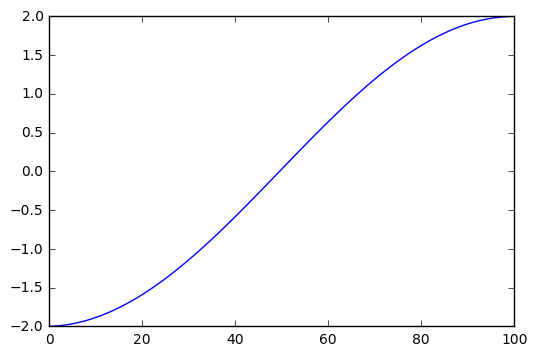

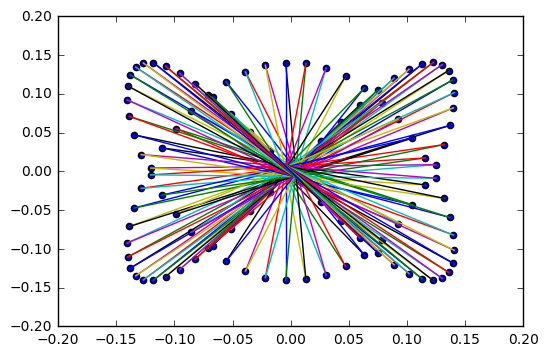

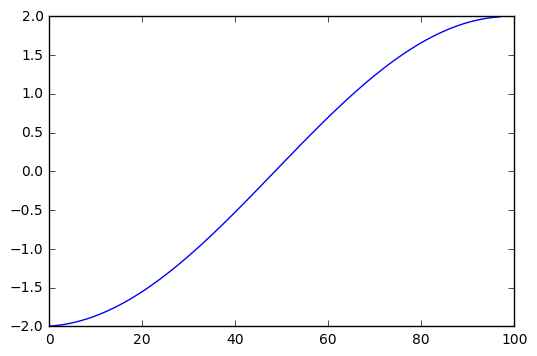

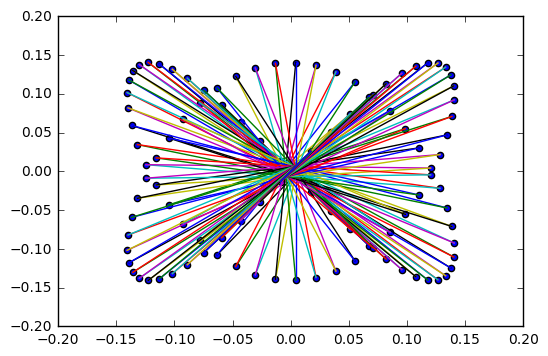

In [88]:
a = Graph(G)

a_L = a.create_Lap_A()
a_A = a.create_Adj_A()
a.compute_eig(a_A)
a.plot_eigenval()
a.plot_edge_eigenvec(2,3)

#a_S_L = a.create_sparse_Lap()
#a_S_A = a.create_sparse_Adj()
# g.print_scipy(a_S_L.asfptype())
#a.compute_sparse_eig(a_S_A)
a.plot_sparse_eigenval(a.Adj)
a.plot_edge_eigenvec_sparse(a.Adj, 1, 2)
# g.print_scipy(a_S_L)



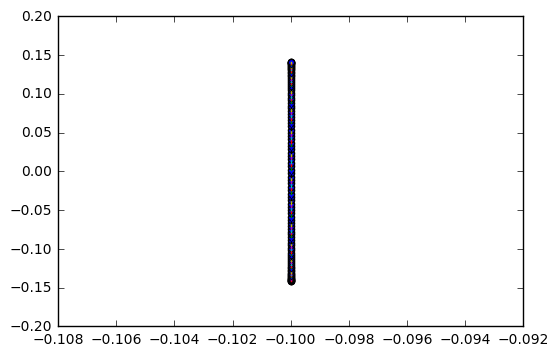

In [90]:
a.plot_edge_eigenvec_sparse(a.Lap, 1, 2)

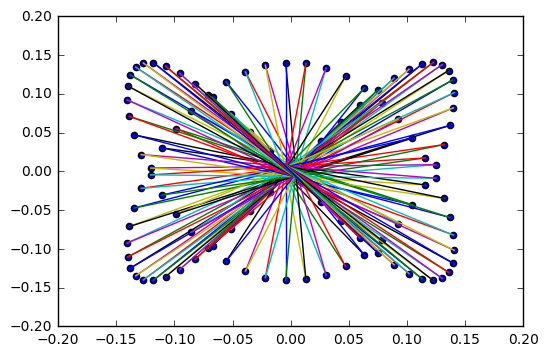

In [92]:
a.plot_edge_eigenvec(2,3)